
# FRED경제 데이터 활용
---@ Pablo

## FRED 경제데이터 API
- ref1.https://github.com/mortada/fredapi
- ref2.https://research.stlouisfed.org/docs/api/api_key.html
- ref3. https://junyoru.tistory.com/122



In [1]:
# !pip install fredapi

In [4]:
from fredapi import Fred

In [5]:
fred = Fred(api_key='')

In [6]:
data = fred.get_series('SP500')

In [7]:
data.tail()

2021-10-01    4357.04
2021-10-04    4300.46
2021-10-05    4345.72
2021-10-06    4363.55
2021-10-07    4399.76
dtype: float64

## S&P500 지수 시각화
API를 이용해서 s&p500 지수를 가져오고 가져온 데이터를 시계열 그래프로 표현

<AxesSubplot:>

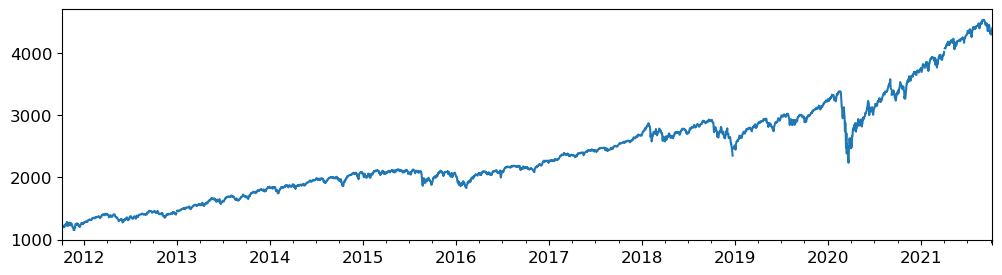

In [9]:
import matplotlib.pyplot as plt
plt.style.use('default')

plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12

data.plot()

## 미국 기준금리
API를 이용해서 기준금리를 가져오고 가져온 데이터를 시계열 그래프로 표현

In [10]:
# 기준금리 INTDSRUSM193N
Interest_Rates = fred.get_series('INTDSRUSM193N')

In [11]:
Interest_Rates.dropna(inplace=True)

<AxesSubplot:>

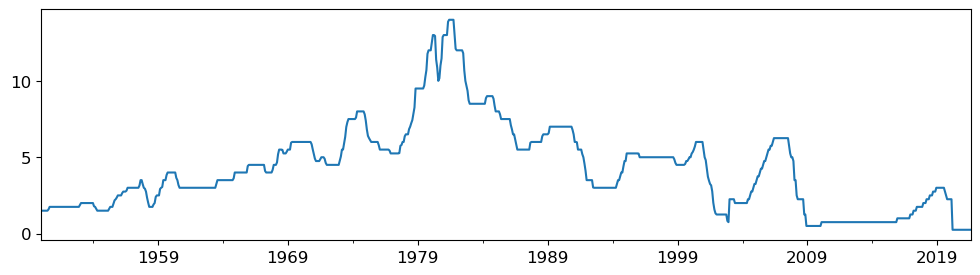

In [12]:
# import matplotlib.pyplot as plt
plt.style.use('default')

plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12

Interest_Rates.plot()

In [13]:
Interest_Rates.tail()

2021-04-01    0.25
2021-05-01    0.25
2021-06-01    0.25
2021-07-01    0.25
2021-08-01    0.25
dtype: float64

## 미국금리와 S&P500 지수 시각화

<AxesSubplot:>

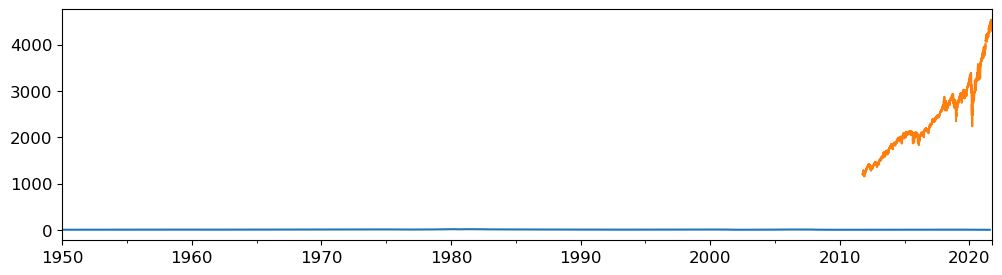

In [14]:
Interest_Rates.plot()
data.plot()

# 2. finance-datareader

## finance-datareader 패키지 설치

In [12]:
# !pip install finance-datareader --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org

In [15]:
import ssl
context = ssl._create_unverified_context()

# import requests
# response = requests.get(url,verify=False)

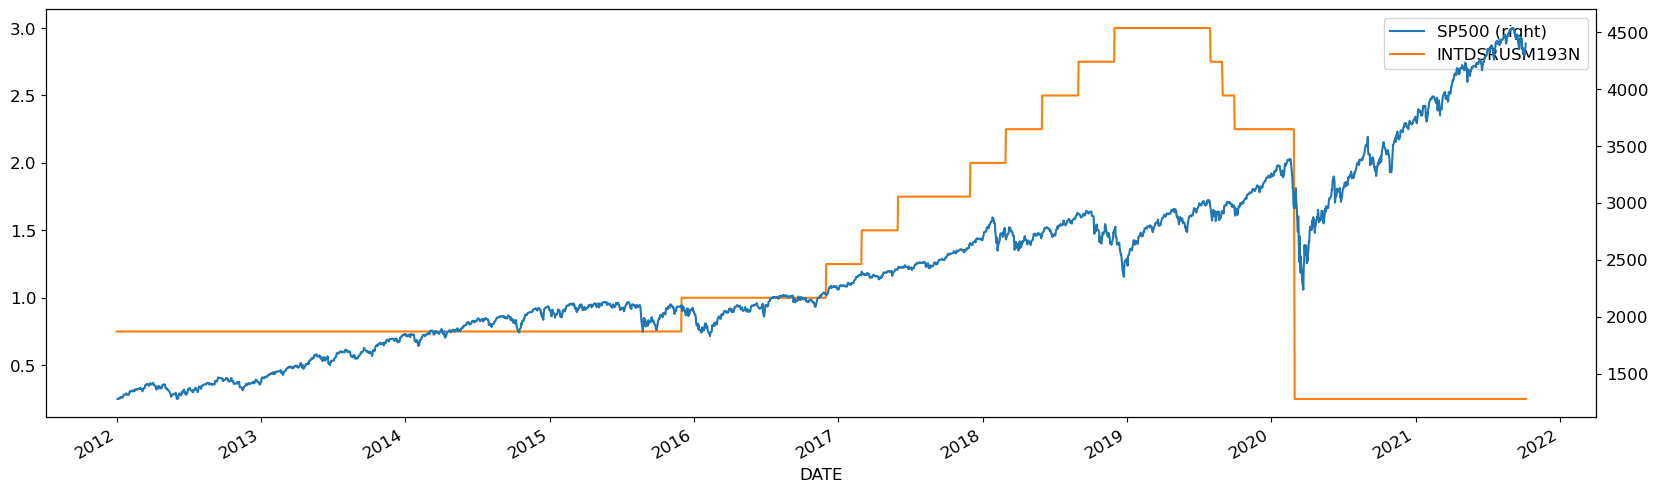

In [16]:
# 기준금리, 주가

import FinanceDataReader as fdr
import matplotlib as plt

plt.rcParams["figure.figsize"] = (20,6)

IR_SP = fdr.DataReader(['INTDSRUSM193N', 'SP500'], start = '2012', data_source='fred')
graph = IR_SP.plot(secondary_y = 'SP500')

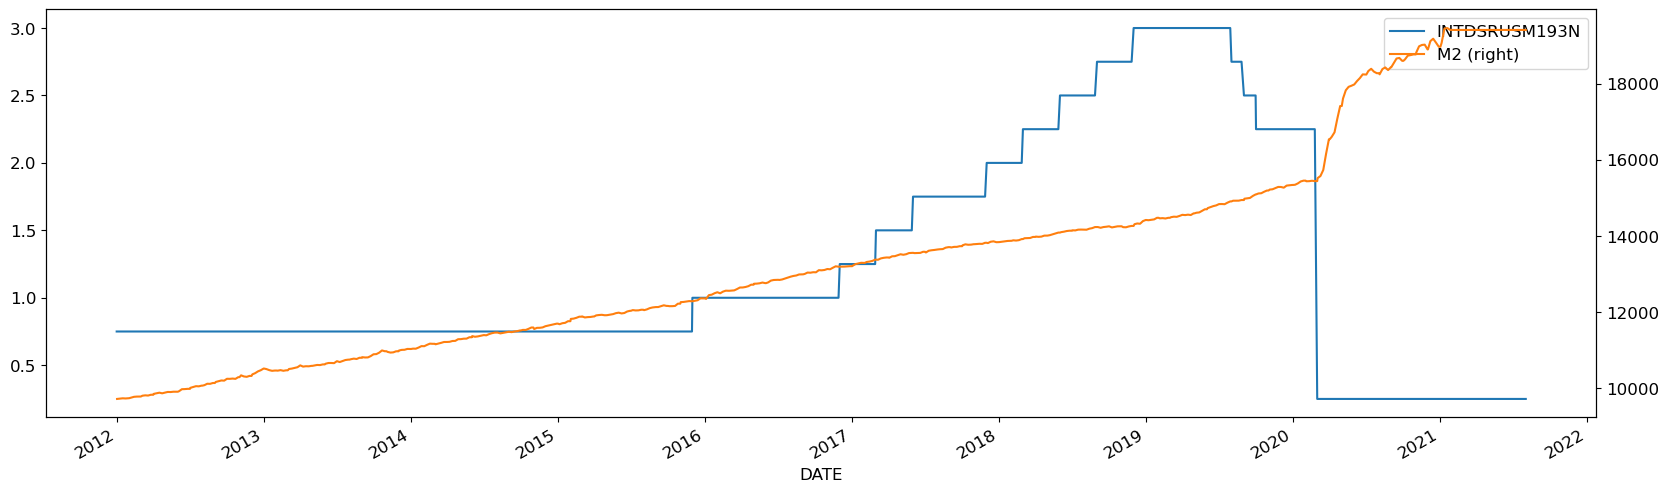

In [29]:
# 기준금리, 통화량

import FinanceDataReader as fdr
import matplotlib as plt

plt.rcParams["figure.figsize"] = (20,6)

IR_SP = fdr.DataReader(['INTDSRUSM193N', 'M2'], start = '2012', data_source='fred')
graph = IR_SP.plot(secondary_y = 'M2')

## 2.2 미국 장단기 금리차이

ref. https://www.youtube.com/watch?v=5sbZRGHnaR

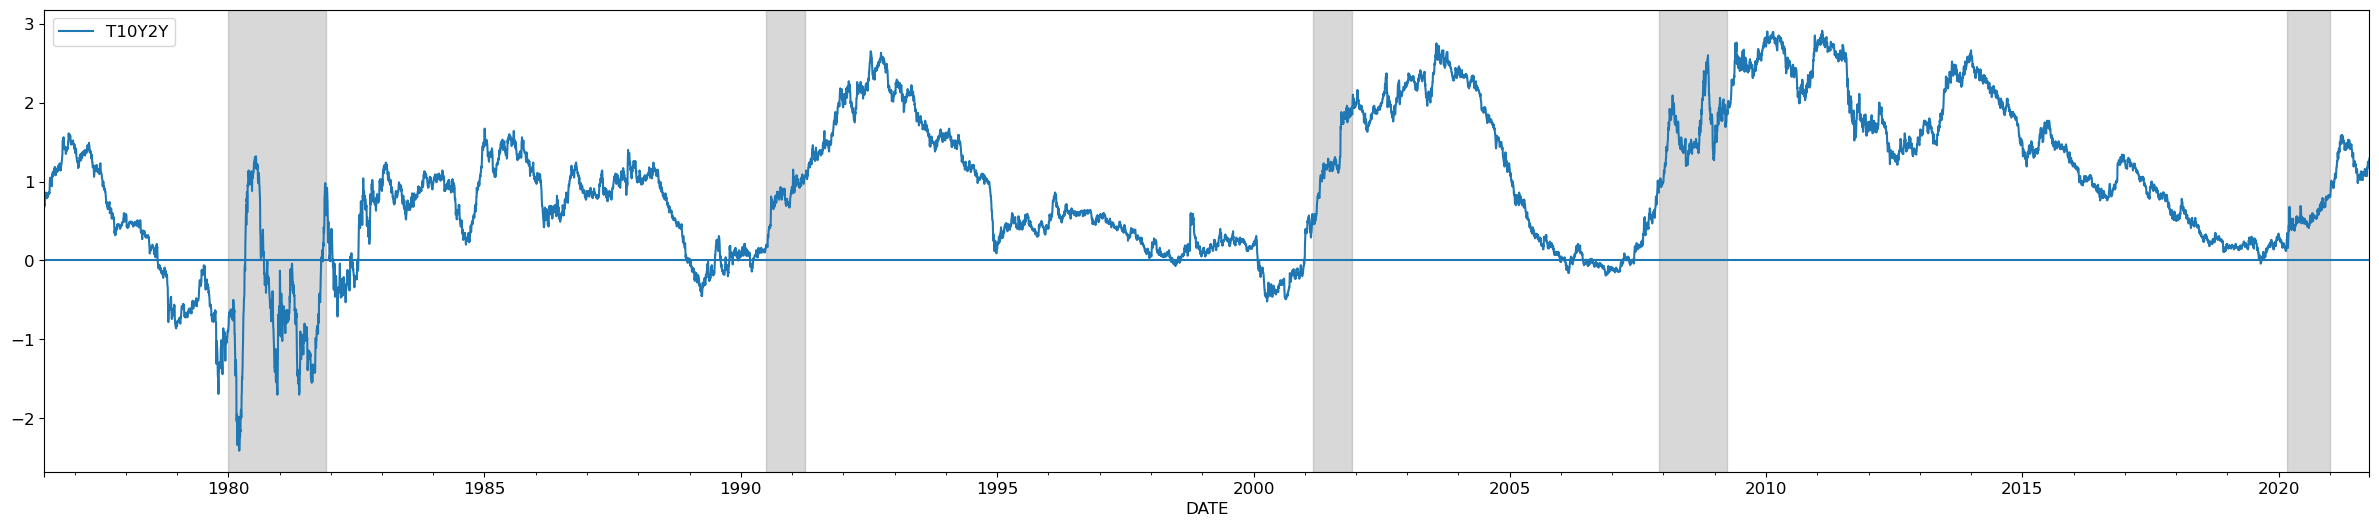

In [30]:
import FinanceDataReader as fdr
import matplotlib as plt

import ssl
context = ssl._create_unverified_context()

plt.rcParams["figure.figsize"] = (30,6)
Interest_rate_diff =fdr.DataReader('T10Y2Y', data_source='fred')
graph = Interest_rate_diff.plot()

graph.axhline(y=0) #xmin=0.1, xmax=0.9)

graph.axvspan('1980-01-01', '1981-12-01',color='gray', alpha=0.3)
graph.axvspan('1990-07-01', '1991-04-01',color='gray', alpha=0.3)
graph.axvspan('2001-03-01', '2001-12-01',color='gray', alpha=0.3)
graph.axvspan('2007-12-01', '2009-03-30',color='gray', alpha=0.3)
graph.axvspan('2020-03-01', '2020-12-30',color='gray', alpha=0.3)

## M2 통화량

* M0 통화량(본원통화) : 한국은행에서 시중은행으로 들어가는 실제 돈(이 돈이 대출을 통해 통화가 팽창)
* M1 통화량(협의통화) : 우리가 당장 은행에 가서 현금으로 찾을 수 있는 유동성이 높은 통화의 양 ( = 요구불 예금 + 수시 입출금식 예금 )
* M2 통화량(광의통화) : 시중 유동성을 참고하는 지표, 경제관련 기사에서 등장하는 통화량으로 경제성장률, 물가, 금리를 감안하여 조절                        M1통화량에 추가로 2년 미만 정기예적금 + 시장형 금융상품(펀트) + 금융채권 + 양도성예금증서(CD) 를 포함

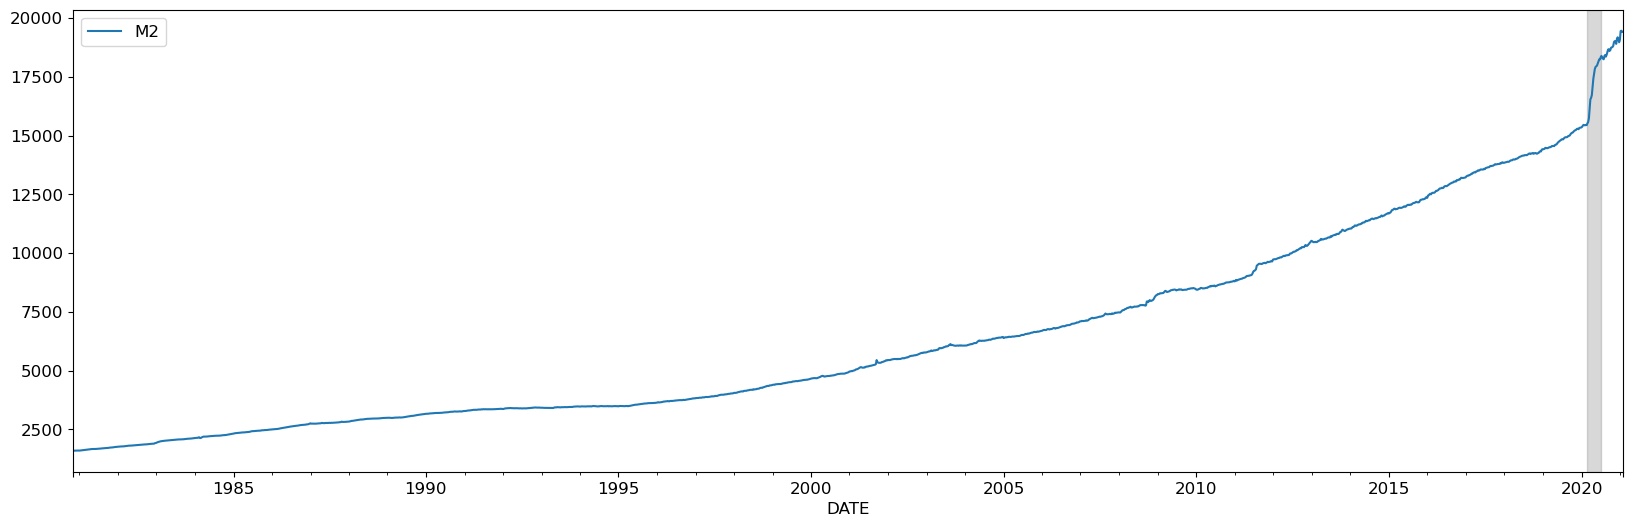

In [31]:
# M2 통화량, 나스닥, 주택가격지수
import FinanceDataReader as fdr
import matplotlib as plt

import ssl
context = ssl._create_unverified_context()

plt.rcParams["figure.figsize"] = (20,6)
M2 =fdr.DataReader('M2', data_source='fred')
# NAS_M2 =fdr.DataReader('NASDAQCOM', 'M2', data_source='fred')

graph = M2.plot()

graph.axvspan('2020-03-01', '2020-06-30',color='gray', alpha=0.3) # 코로나 COVID-19

## 2.4 NASDAQ 지수

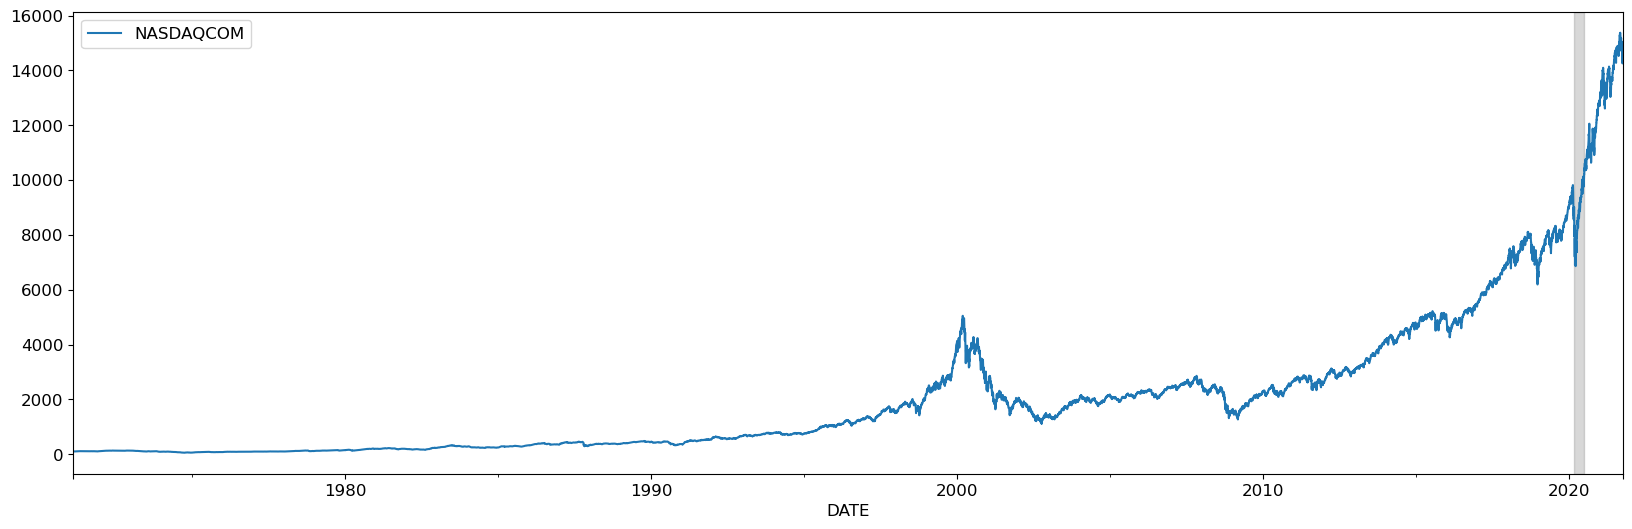

In [32]:
plt.rcParams["figure.figsize"] = (20,6)

NAS =fdr.DataReader('NASDAQCOM', data_source='fred')
NAS

graph = NAS.plot()
graph.axvspan('2020-03-01', '2020-06-30',color='gray', alpha=0.3) # 코로나 COVID-19

## 2.5 M2 통화량과 나스닥

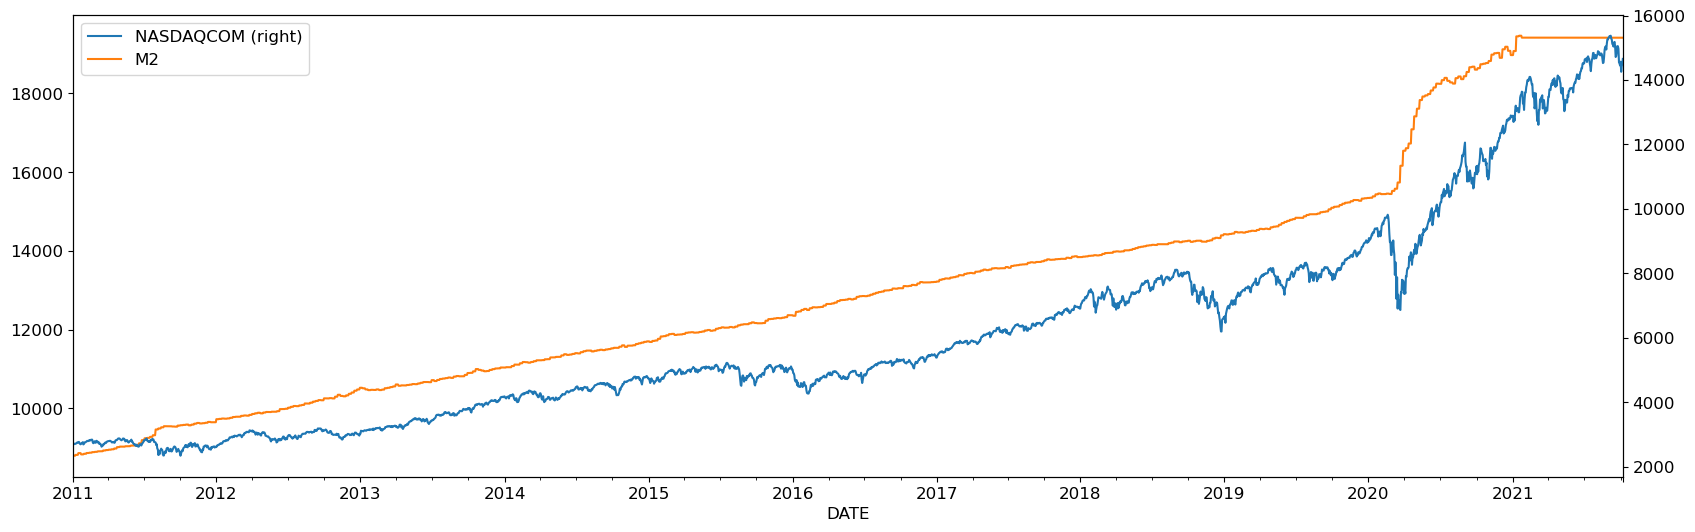

In [34]:
import FinanceDataReader as fdr
import matplotlib as plt

# pd.to_datetime(date_col_to_force, errors = 'coerce')

plt.rcParams["figure.figsize"] = (20,6)

M2 = fdr.DataReader(['NASDAQCOM', 'M2'], start = '2011', data_source='fred')
# pd.to_datetime(M2, errors = 'coerce')
# NAS =fdr.DataReader('NASDAQCOM', data_source='fred')
graph = M2.plot(secondary_y = 'NASDAQCOM')

# graph.axvspan('2020-03-01', '2020-06-30',color='gray', alpha=0.3) # 코로나 COVID-19

### M2 통화량, 나스탁의 상관관계

In [35]:
import numpy as np

def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

M2.corr(method=histogram_intersection)

,NASDAQCOM,M2
NASDAQCOM,1.0,17234188.0
M2,17234188.0,1.0


In [38]:
# M2.corrwith

In [37]:
M2.corr(method='pearson', min_periods=1)

,NASDAQCOM,M2
NASDAQCOM,1.000000,0.976808
M2,0.976808,1.000000


## 달러 대비 원화 환율 데이터 수집

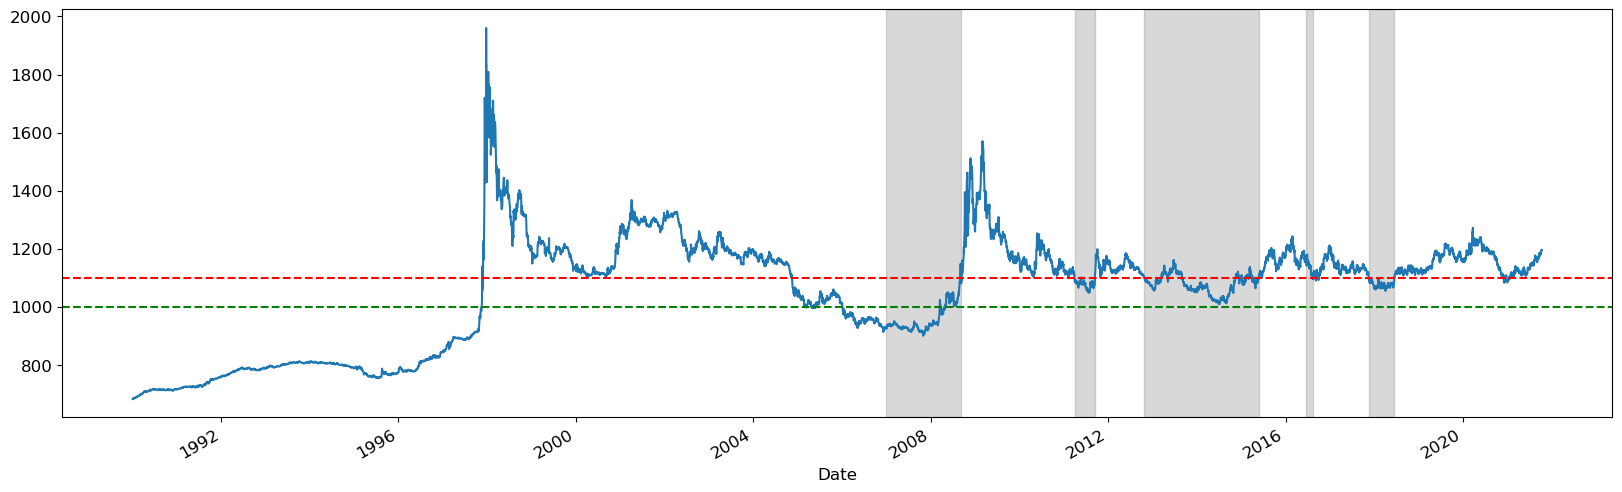

In [39]:
import FinanceDataReader as fdr
import matplotlib as plt
import ssl

context = ssl._create_unverified_context()
# git config --global http.sslVerify false

plt.rcParams["figure.figsize"] = (20,6)

USD_KRX = fdr.DataReader('USD/KRW')
graph = USD_KRX.loc['1990-01-01':, 'Close'].plot()

graph.axhline(1000, ls='--', color = 'g')
graph.axhline(1100, ls='--', color = 'r')

graph.axvspan('2007-01-01', '2008-09-10',color='gray', alpha=0.3)
graph.axvspan('2011-03-31', '2011-09-13',color='gray', alpha=0.3)
graph.axvspan('2012-10-25', '2015-05-25',color='gray', alpha=0.3)
graph.axvspan('2016-08-10', '2016-06-14',color='gray', alpha=0.3)
graph.axvspan('2017-11-16', '2018-06-14',color='gray', alpha=0.3)

# M2 = fdr.DataReader(['NASDAQCOM', 'M2'], start = '2011', data_source='fred')
# # pd.to_datetime(M2, errors = 'coerce')
# # NAS =fdr.DataReader('NASDAQCOM', data_source='fred')
# graph = M2.plot(secondary_y = 'NASDAQCOM')

# graph.axvspan('2020-03-01', '2020-06-30',color='gray', alpha=0.3) # 코로나 COVID-19

In [23]:
USD_KRX.describe()

,Close,Open,High,Low,Change
count,10443.000000,10443.000000,10443.000000,10443.000000,10443.000000
mean,997.953746,997.725006,1001.283998,994.989814,0.000076
std,202.571918,201.913827,205.794843,199.434390,0.006727
min,667.200000,667.200000,667.200000,667.200000,-0.179600
25%,800.575000,800.600000,800.825000,800.425000,-0.001400
50%,1040.150000,1040.150000,1044.500000,1037.100000,0.000000
75%,1155.500000,1155.175000,1159.695000,1151.580000,0.001300
max,1960.000000,1853.000000,1995.000000,1832.000000,0.146200


# 3. 주택가격지수와 각 경제지표와의 상관관계

## 3.1 케이스-쉴러 지수와 M2 통화량

,CSUSHPISA,M2
CSUSHPISA,1.000000,0.956167
M2,0.956167,1.000000


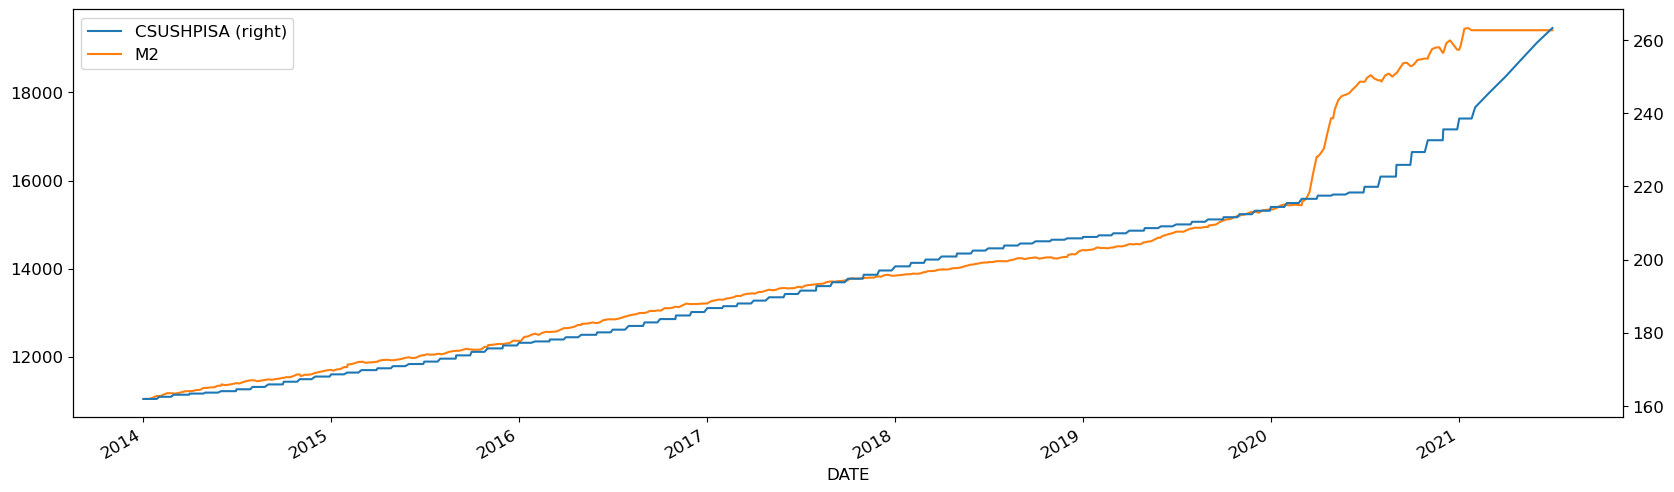

In [24]:
plt.rcParams["figure.figsize"] = (20,6)

CS_M2 = fdr.DataReader(['CSUSHPISA', 'M2'], start = '2014', data_source='fred')
# pd.to_datetime(M2, errors = 'coerce')
# NAS =fdr.DataReader('NASDAQCOM', data_source='fred')

graph = CS_M2.plot(secondary_y = 'CSUSHPISA')
CS_M2.corr(method='pearson', min_periods=1)
# graph.axvspan('2020-03-01', '2020-06-30',color='gray', alpha=0.3) # 코로나 COVID-19  
# All-Transactions House Price Index for the United States  / USSTHPI

## 3.2 케이스-쉴러 지수 + US House Price Index + M2 통화량 

In [25]:
# M2 통화량과, 나스닥, 주택가격지수

import FinanceDataReader as fdr
import matplotlib as plt

## @@@@@@@@파이썬에서 CERTIFICATE_VERIFY_FAILED 에러 @@@@@@
## [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1125)')))
import ssl
context = ssl._create_unverified_context()

# pd.to_datetime(date_col_to_force, errors = 'coerce')

plt.rcParams["figure.figsize"] = (20,6)

US_CS_M2 = fdr.DataReader(['CSUSHPISA', 'M2', 'USSTHPI'], start = '2014', data_source='fred')
# pd.to_datetime(M2, errors = 'coerce')
# NAS =fdr.DataReader('NASDAQCOM', data_source='fred')

print(US_CS_M2)
# graph = US_CS_M2.plot(secondary_y = 'CSUSHPISA')
US_CS_M2.corr(method='pearson', min_periods=1)


# graph.axvspan('2020-03-01', '2020-06-30',color='gray', alpha=0.3) # 코로나 COVID-19  
# All-Transactions House Price Index for the United States  / USSTHPI

            CSUSHPISA  USSTHPI       M2
DATE                                   
2014-01-01    161.944   331.99      NaN
2014-01-06    161.944   331.99  11045.5
2014-01-13    161.944   331.99  11044.1
2014-01-20    161.944   331.99  11074.4
2014-01-27    161.944   331.99  11111.5
...               ...      ...      ...
2021-03-01    245.728   484.26  19411.9
2021-04-01    250.045   510.08  19411.9
2021-05-01    254.626   510.08  19411.9
2021-06-01    259.298   510.08  19411.9
2021-07-01    263.305   510.08  19411.9

[449 rows x 3 columns]


,CSUSHPISA,USSTHPI,M2
CSUSHPISA,1.000000,0.994412,0.956167
USSTHPI,0.994412,1.000000,0.946143
M2,0.956167,0.946143,1.000000


## 3.3 케이스-쉴러 지수(CSUSHPISA)와 주간 실업수당 청구 건수(ICSA)

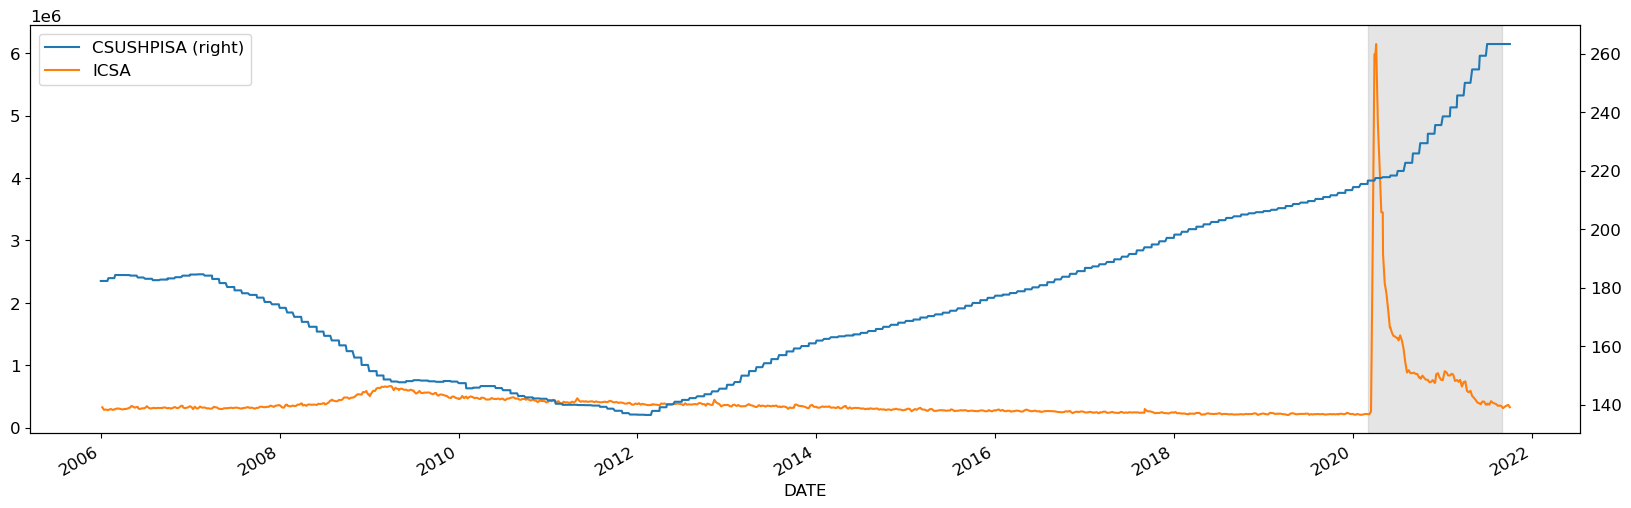

In [40]:
df = fdr.DataReader(['CSUSHPISA', 'ICSA'], start='2006', end='2022', data_source='fred')
ax = df.plot(secondary_y='CSUSHPISA')
ax = ax.axvspan('2020-03-01', '2021-08-30', color='gray', alpha=0.2)

## 3.4 미국 주택판매지수

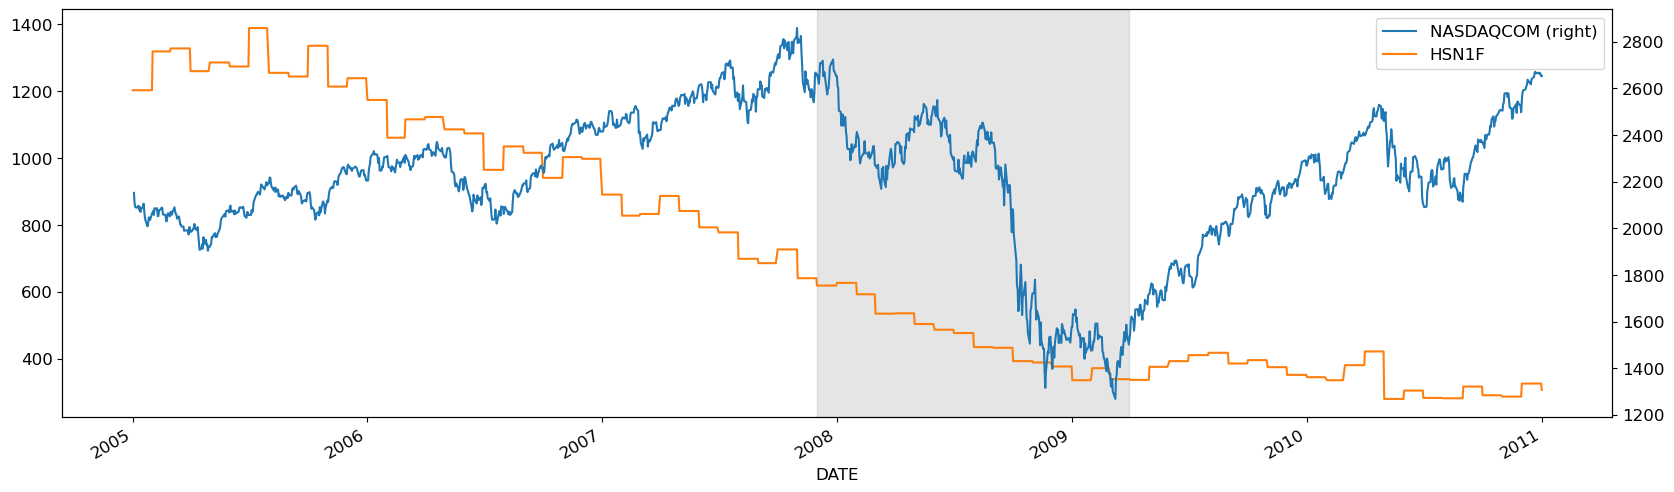

In [26]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 주택 판매 지수

df = fdr.DataReader(['NASDAQCOM', 'HSN1F'], start='2005', end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

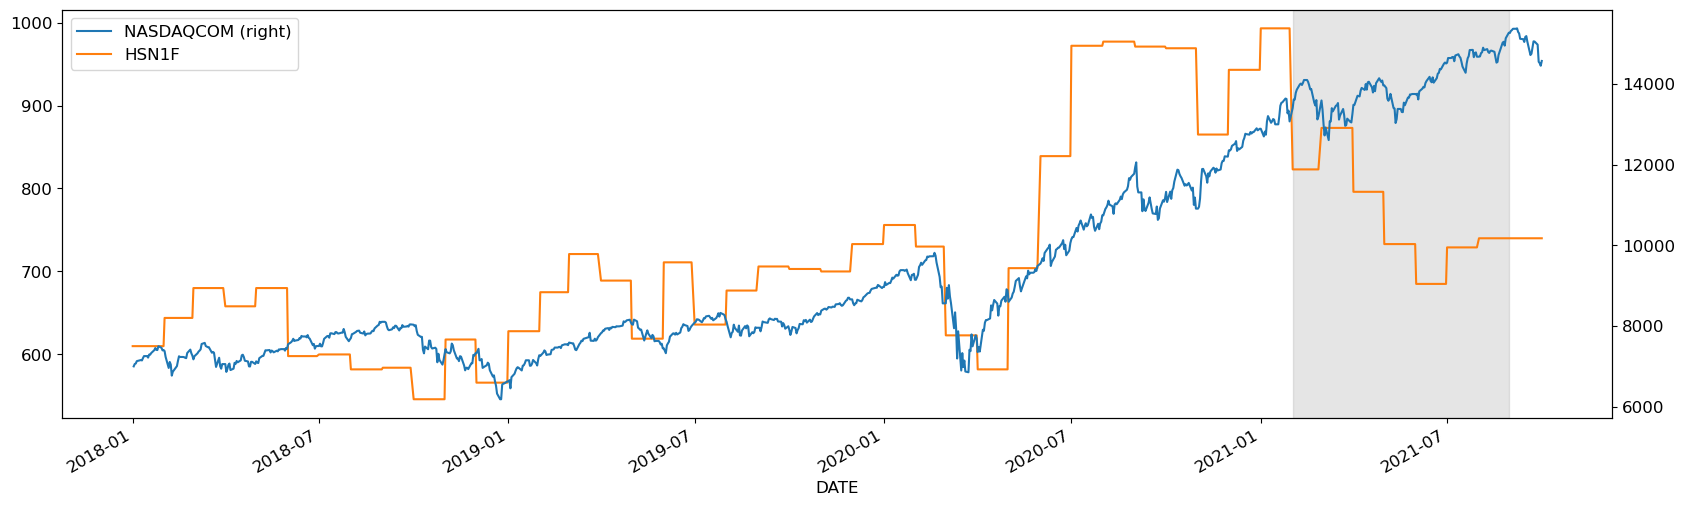

In [27]:
# 2021년 8월 현재 주택판매지수와 나스닥 지수와의 관계 

df = fdr.DataReader(['NASDAQCOM', 'HSN1F'], start='2018', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2021-02-01', '2021-08-30', color='gray', alpha=0.2)

In [28]:
df

,NASDAQCOM,HSN1F
DATE,,
2018-01-01,NaN,610.0
2018-01-02,7006.90,610.0
2018-01-03,7065.53,610.0
2018-01-04,7077.91,610.0
2018-01-05,7136.56,610.0
...,...,...
2021-09-27,14969.97,740.0
2021-09-28,14546.68,740.0
2021-09-29,14512.44,740.0


# 4. Macro 지표와 주택가격지수

S&P500 지수, 케이스&쉴러지수, 미국기준금리, 미국주택가격지수, M2 통화량에 대한 상관관계 한번에 

In [41]:
df_all = fdr.DataReader(['CSUSHPISA', 'M2', 'USSTHPI','INTDSRUSM193N', 'SP500'], start = '2014', data_source='fred')
df_all.corr(method='pearson', min_periods=1)

,SP500,CSUSHPISA,INTDSRUSM193N,USSTHPI,M2
SP500,1.000000,0.979703,-0.070208,0.961074,0.947328
CSUSHPISA,0.979703,1.000000,-0.039318,0.989774,0.966116
INTDSRUSM193N,-0.070208,-0.039318,1.000000,0.032524,-0.209654
USSTHPI,0.961074,0.989774,0.032524,1.000000,0.960710
M2,0.947328,0.966116,-0.209654,0.960710,1.000000


In [42]:
df_allinone = fdr.DataReader(['CSUSHPISA', 'M2', 'USSTHPI','INTDSRUSM193N', 'SP500', 'ICSA', 'HSN1F'], start = '2014', data_source='fred')
df_allinone.corr(method='pearson', min_periods=1)

,SP500,CSUSHPISA,INTDSRUSM193N,HSN1F,USSTHPI,M2,ICSA
SP500,1.000000,0.979629,-0.070239,0.800439,0.960959,0.947181,0.181645
CSUSHPISA,0.979629,1.000000,-0.039660,0.812235,0.989787,0.966120,0.256516
INTDSRUSM193N,-0.070239,-0.039660,1.000000,-0.067630,0.031959,-0.210205,-0.357380
HSN1F,0.800439,0.812235,-0.067630,1.000000,0.841183,0.879592,0.245048
USSTHPI,0.960959,0.989787,0.031959,0.841183,1.000000,0.960762,0.282562
M2,0.947181,0.966120,-0.210205,0.879592,0.960762,1.000000,0.369406
ICSA,0.181645,0.256516,-0.357380,0.245048,0.282562,0.369406,1.000000


In [43]:
df_allinone

,SP500,CSUSHPISA,INTDSRUSM193N,HSN1F,USSTHPI,M2,ICSA
DATE,,,,,,,
2014-01-01,NaN,161.944,0.75,443.0,331.99,NaN,NaN
2014-01-02,1831.98,161.944,0.75,443.0,331.99,NaN,NaN
2014-01-03,1831.37,161.944,0.75,443.0,331.99,NaN,NaN
2014-01-04,1831.37,161.944,0.75,443.0,331.99,NaN,322000.0
2014-01-06,1826.77,161.944,0.75,443.0,331.99,11045.5,322000.0
...,...,...,...,...,...,...,...
2021-10-02,4357.04,263.305,0.25,740.0,510.08,19411.9,326000.0
2021-10-04,4300.46,263.305,0.25,740.0,510.08,19411.9,326000.0
2021-10-05,4345.72,263.305,0.25,740.0,510.08,19411.9,326000.0
